# Perceptron learning Algorithm

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import random
import math
from mpl_toolkits.mplot3d import Axes3D

In [182]:
url = 'classification_train_data.csv'

In [183]:
dataset = pd.read_csv(url)

In [184]:
#definition of perceptron learning algorithm
def perceptron_algo(w,df):
    arr = df.to_numpy()
    row_count = df.shape[0]
    misclassification = 10 # Assuming misclassification initially
    while misclassification>0:
        misclassification = 0
        for i in range(200):
            x_1 = arr[i,0]
            x_2 = arr[i,1]
            y_true = arr[i,2]
            if y_true == 0:           #Assume label 0 is -1 and label 1 is +1
                y_true = -1
            else:
                y_true = +1
            
            res = (w[0] * x_1) + (w[1] * x_2)
            if (res*y_true)>0: #sign are equal
                continue
            else:
                misclassification = misclassification + 1 #*******Update the weight
                w[0] = w[0] + (x_1*y_true)
                w[1] = w[1] + (x_2*y_true)  
        #print(misclassification)          
                
    return w

In [185]:
w = [0,1] #initial weight
out_weight = perceptron_algo(w,dataset)

In [186]:
print(out_weight)

[-17.491825264096352, 16.76442185975007]


In [187]:
def predict(arr,out_weight = out_weight):
    row_count = arr.shape[0]
    label_pred = np.zeros((row_count,1))
    m = np.zeros((row_count,1))
    n = np.zeros((row_count,1))
    for i in range(row_count):
        x1 = arr[i,0]
        m[i] = x1
        x2 = arr[i,1]
        n[i] = x2
        #y_true[i] = arr[i,2]
        result = (out_weight[0] * x1) + (out_weight[1]*x2)
        if (result<-1):
            label_pred[i] = 0
        if (result>1):
            label_pred[i] = 1
    return label_pred,m,n

In [188]:
#Confusion matrix for training data
mat = np.zeros((2,2))
training_data = dataset.to_numpy()
y_p,m,n = predict(training_data)
y_truelabel = training_data[:,2]
for i in range(training_data.shape[0]):
    x = int(y_truelabel[i])
    y = int(y_p[i])
    mat[x,y] = mat[x,y] + 1
print('confusion matrix for training data is as below:')
print(mat)
print('training accuracy in percentage:')
acc = (mat[0,0] + mat[1,1])/training_data.shape[0]
print(acc*100)

confusion matrix for training data is as below:
[[ 90.   0.]
 [  0. 110.]]
training accuracy in percentage:
100.0


In [189]:
url_test = 'classification_test_data.csv'

In [190]:
dataset_test = pd.read_csv(url_test)

In [191]:
#COnfusion matrix for test data 
mat1 = np.zeros((2,2))
arr_data = dataset_test.to_numpy()
#label_pred,m,n = predict(arr_data)
y_p,m,n = predict(arr_data)
#Saving the predicted output
np.savetxt('Question2_parta_test_prediction',y_p,delimiter=',')
y_truelabel = arr_data[:,2]
for i in range(arr_data.shape[0]):
    x = int(y_truelabel[i])
    y = int(y_p[i])
    mat1[x,y] = mat1[x,y] + 1
print('confusion matrix for test data is:')
print(mat1)
print('test accuracy in percentage:')
acc = (mat1[0,0] + mat1[1,1])/arr_data.shape[0]
print(acc*100)

confusion matrix for test data is:
[[59.  0.]
 [ 0. 41.]]
test accuracy in percentage:
100.0


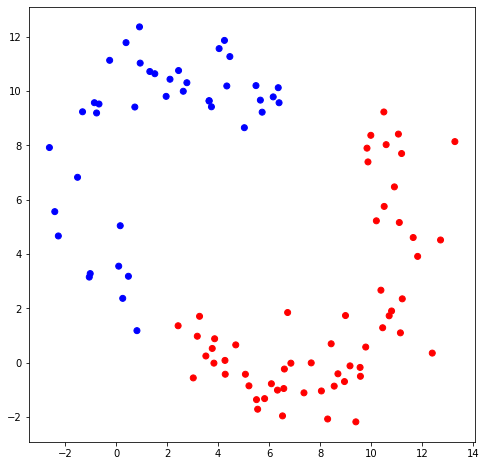

In [192]:
fig = plt.figure(figsize=(8,8))
colors = ['red','blue']
plt.scatter(m, n, c=y_p, cmap=matplotlib.colors.ListedColormap(colors))

In [193]:
arr_test = dataset_test.to_numpy()
min1, max1 = arr_test[:, 0].min() - 1, arr_test[:, 0].max() + 1 #1st feature
min2, max2 = arr_test[:, 1].min() - 1, arr_test[:, 1].max() + 1 #2nd feature
#print(min2,max2)
x1_scale = np.arange(min1, max1, 0.1)
x2_scale = np.arange(min2, max2, 0.1)
x_grid, y_grid = np.meshgrid(x1_scale, x2_scale)
# flatten each grid to a vector
x_g, y_g = x_grid.flatten(), y_grid.flatten()
x_g, y_g = x_g.reshape((len(x_g), 1)), y_g.reshape((len(y_g), 1))
grid = np.hstack((x_g, y_g))

In [194]:
label_pred,m,n = predict(grid)
#print(label_pred)
pp_grid = label_pred.reshape(x_grid.shape)

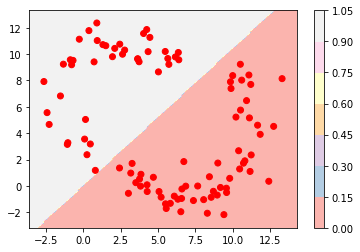

In [195]:
# plot the grid of x, y and z values as a surface
surface = plt.contourf(x_grid, y_grid, pp_grid, cmap='Pastel1')
plt.colorbar(surface)

label_pred1 = np.zeros((100,1))
m1 = np.zeros((100,1))
n1 = np.zeros((100,1))
for i in range(100):
    m1[i] = arr_test[i,0]
    n1[i]= arr_test[i,1]
#print(output_label_class2)
# create scatter plot for samples from each class
plt.scatter(m1, n1, c=label_pred1,cmap=matplotlib.colors.ListedColormap(colors))
# show the plot
plt.show()


# Question part b , c and d

In [196]:
arr = dataset.to_numpy()

In [197]:
#def variance(arr,mean_x,mean_y):
   # sum1_x = 0
    #sum1_y = 0
    #length = arr.shape[0]
   # count = 0
    #for i in range(length):
       # sum1_x = sum1_x + ((arr[i,0] - mean_x)*(arr[i,0] - mean_x))
      #  sum1_y = sum1_y + ((arr[i,1] - mean_y)*(arr[i,1] - mean_y))
      #  count = count+1
    #return sum1_x/length,sum1_y/length

In [198]:
def mean(arr):
    length = arr.shape[0]
    sum1_x = 0 
    sum1_y = 0
    sum2_x = 0
    sum2_y = 0
    count = 0
    for i in range(length):
        if arr[i,2] == 0:
            sum1_x = sum1_x + arr[i,0]
            sum1_y = sum1_y + arr[i,1]
            count = count + 1
        if arr[i,2] == 1:
            sum2_x = sum2_x + arr[i,0]
            sum2_y = sum2_y + arr[i,1]
    
    mean1_x = sum1_x/count
    mean1_y = sum1_y/count
    mean2_x = sum2_x/(length-count)
    mean2_y = sum2_y/(length-count)
    return mean1_x,mean1_y,mean2_x,mean2_y
    

In [199]:
def prior_Probability(arr):
    length = arr.shape[0]
    count = 0
    for i in range(length):
        if arr[i,2] == 0: #count class 0 occurance
            count = count + 1
    p1 = count/length
    return p1, 1-p1

In [200]:
mean1_x,mean1_y,mean2_x,mean2_y = mean(arr)
mean_arr1 = [mean1_x,mean1_y]
mean_arr2 = [mean2_x,mean2_y]
print(mean_arr2)

[2.3074299658790656, 8.725641228485904]


In [201]:
p1,p2 = prior_Probability(arr)
probability_arr = [p1,p2]
print(p1,p2)        

0.45 0.55


In [202]:
def discriminant_fun(data_test,mean_training,covariance_mat,probability_class):
    det_mat = np.linalg.det(covariance_mat)
    if det_mat != 0:
        inv_mat = np.linalg.inv(covariance_mat)
    length = data_test.shape[0]
    output_label = np.zeros((length,1))
    #Calculate discriminant function for both class1 and class2
    for i in range(length):
        x = data_test[i,0]
        y = data_test[i,1]
        diff_vect = [[x - mean_training[0]],[y - mean_training[1]]] #column vector
        val = np.matmul(inv_mat,diff_vect)
        diff_vector1 = np.transpose(diff_vect)
        val = np.matmul(diff_vector1,diff_vect)  
        val = (-val)/2  #- np.log(det_mat) + math.log(probability_class)
        output_label[i] = val
    return output_label

In [203]:
#*******Question 2(b)*********

In [204]:
# when covariance matrix for both classes are equal i.e. C1 = C2 = σ2I for some σ
# declaring covariance matrix
v = np.var(arr)
C1 = [[v,0],[0,v]]
C2 = C1
print(C2)

[[16.28349919561478, 0], [0, 16.28349919561478]]


In [205]:
####*******Prediction on test data************
arr1 = dataset_test.to_numpy()
output_label_class1 = discriminant_fun(arr1,mean_arr1,C1,p1)
output_label_class2 = discriminant_fun(arr1,mean_arr2,C2,p2)
#print(output_label_class1 - output_label_class2)
label_pred3 = np.zeros((100,1))
m3 = np.zeros((100,1))
n3 = np.zeros((100,1))
for i in range(100):
    m3[i] = arr1[i,0]
    n3[i]= arr1[i,1]
    if output_label_class1[i]>output_label_class2[i]:
        label_pred3[i] = 0
    else:# output_label_class1[i]>output_label_class2[i]:
        label_pred3[i] = 1

#Saving the predicted output
np.savetxt('Question2_partb_test',label_pred3,delimiter=',')

In [206]:
#Confusion matrix for test data
mat = np.zeros((2,2))
test_data = dataset_test.to_numpy()
y_truelabel = test_data[:,2]
for i in range(100):
    x = int(y_truelabel[i])
    y = int(label_pred3[i])
    mat[x,y] = mat[x,y] + 1
print('confusion matrix for test data is as below:')
print(mat)
print('training accuracy in percentage:')
acc = (mat[0,0] + mat[1,1])/test_data.shape[0]
print(acc*100)

confusion matrix for test data is as below:
[[58.  1.]
 [ 1. 40.]]
training accuracy in percentage:
98.0


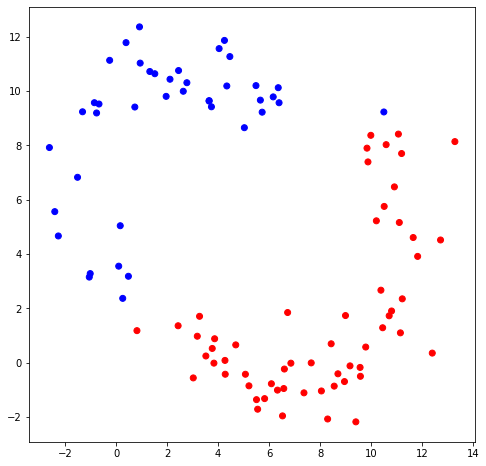

In [207]:
fig = plt.figure(figsize=(8,8))
colors = ['red','blue']
plt.scatter(m3, n3, c=label_pred3,cmap=matplotlib.colors.ListedColormap(colors))

In [208]:
min1, max1 = arr1[:, 0].min() - 1, arr1[:, 0].max() + 1 #1st feature
min2, max2 = arr1[:, 1].min() - 1, arr1[:, 1].max() + 1 #2nd feature
#print(min2,max2)
x1_scale = np.arange(min1, max1, 0.1)
x2_scale = np.arange(min2, max2, 0.1)
x_grid, y_grid = np.meshgrid(x1_scale, x2_scale)
# flatten each grid to a vector
x_g, y_g = x_grid.flatten(), y_grid.flatten()
x_g, y_g = x_g.reshape((len(x_g), 1)), y_g.reshape((len(y_g), 1))
grid = np.hstack((x_g, y_g))

In [209]:
output_label_class1 = discriminant_fun(grid,mean_arr1,C1,p1)
output_label_class2 = discriminant_fun(grid,mean_arr2,C2,p2)
#print(output_label_class1 - output_label_class2)
length = grid.shape[0]
label_pred1 = np.zeros((length,1))
m3 = np.zeros((length,1))
n3 = np.zeros((length,1))
for i in range(length):
    if output_label_class1[i]>output_label_class2[i]:
        label_pred1[i] = 0
    else:# output_label_class1[i]>output_label_class2[i]:
        label_pred1[i] = 1
pp_grid = label_pred1.reshape(x_grid.shape)

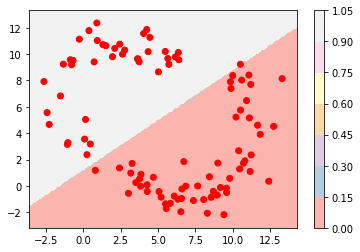

In [210]:
# plot the grid of x, y and z values as a surface
surface = plt.contourf(x_grid, y_grid, pp_grid, cmap='Pastel1')
plt.colorbar(surface)

label_pred1 = np.zeros((100,1))
m1 = np.zeros((100,1))
n1 = np.zeros((100,1))
for i in range(100):
    m1[i] = arr1[i,0]
    n1[i]= arr1[i,1]
    if output_label_class1[i]>output_label_class2[i]:
        label_pred1[i] = 0
    else:# output_label_class1[i]>output_label_class2[i]:
        label_pred1[i] = 1
#print(output_label_class2)
# create scatter plot for samples from each class
plt.scatter(m1, n1, c=label_pred1,cmap=matplotlib.colors.ListedColormap(colors))
# show the plot
plt.show()


In [211]:
#***********Question 2(c)*************

In [212]:
#*******Declaring covariance matrix*****************
C1 = [[np.var(arr[:,0]),0],[0,np.var(arr[:,1])]]
C2 = C1
print(C1)

[[14.485080379789565, 0], [0, 19.955533021400562]]


In [213]:
arr1 = dataset.to_numpy()
output_label_class1 = discriminant_fun(arr1,mean_arr1,C1,p1)
output_label_class2 = discriminant_fun(arr1,mean_arr2,C2,p2)
#print(output_label_class2)
label_pred2 = np.zeros((200,1))
m2 = np.zeros((200,1))
n2 = np.zeros((200,1))
for i in range(200):
    m2[i] = arr1[i,0]
    n2[i]= arr1[i,1]
    if output_label_class1[i]<output_label_class2[i]:
        label_pred2[i] =  1
    if output_label_class1[i]>output_label_class2[i]:
        label_pred2[i] = 0
#Saving the predicted output
np.savetxt('Question2_partc_test',label_pred2,delimiter=',')

In [214]:
#Confusion matrix for test data
mat = np.zeros((2,2))
test_data = dataset.to_numpy()
y_truelabel = test_data[:,2]
for i in range(200):
    x = int(y_truelabel[i])
    y = int(label_pred2[i])
    mat[x,y] = mat[x,y] + 1
print('confusion matrix for test data is as below:')
print(mat)
print('test accuracy in percentage:')
acc = (mat[0,0] + mat[1,1])/test_data.shape[0]
print(acc*100)

confusion matrix for test data is as below:
[[ 90.   0.]
 [  0. 110.]]
test accuracy in percentage:
100.0


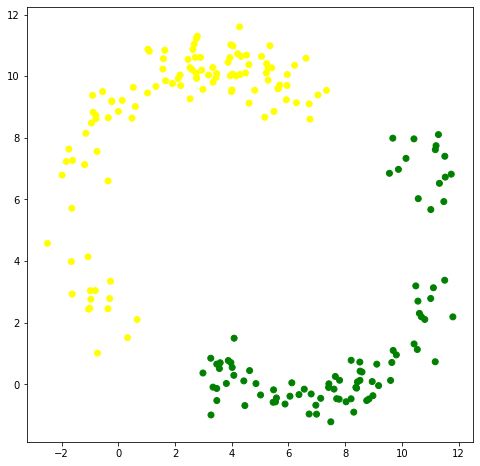

In [215]:
fig = plt.figure(figsize=(8,8))
colors = ['green','yellow']
plt.scatter(m2, n2, c=label_pred2,cmap=matplotlib.colors.ListedColormap(colors))

In [216]:
min1, max1 = arr1[:, 0].min() - 1, arr1[:, 0].max() + 1 #1st feature
min2, max2 = arr1[:, 1].min() - 1, arr1[:, 1].max() + 1 #2nd feature
#print(min2,max2)
x1_scale = np.arange(min1, max1, 0.1)
x2_scale = np.arange(min2, max2, 0.1)
x_grid, y_grid = np.meshgrid(x1_scale, x2_scale)
# flatten each grid to a vector
x_g, y_g = x_grid.flatten(), y_grid.flatten()
x_g, y_g = x_g.reshape((len(x_g), 1)), y_g.reshape((len(y_g), 1))
grid = np.hstack((x_g, y_g))

In [217]:
output_label_class1 = discriminant_fun(grid,mean_arr1,C1,p1)
output_label_class2 = discriminant_fun(grid,mean_arr2,C2,p2)
#print(output_label_class1 - output_label_class2)
length = grid.shape[0]
label_pred3 = np.zeros((length,1))
m3 = np.zeros((length,1))
n3 = np.zeros((length,1))
for i in range(length):
    if output_label_class1[i]>output_label_class2[i]:
        label_pred3[i] = 0
    else:# output_label_class1[i]>output_label_class2[i]:
        label_pred3[i] = 1
pp_grid = label_pred3.reshape(x_grid.shape)

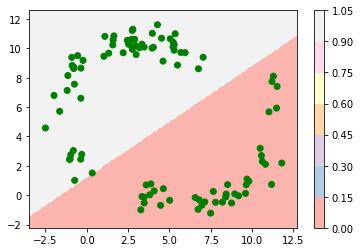

In [218]:
# plot the grid of x, y and z values as a surface
surface = plt.contourf(x_grid, y_grid, pp_grid, cmap='Pastel1')
plt.colorbar(surface)

label_pred3 = np.zeros((100,1))
m3 = np.zeros((100,1))
n3 = np.zeros((100,1))
for i in range(100):
    m3[i] = arr1[i,0]
    n3[i]= arr1[i,1]
    if output_label_class1[i]>output_label_class2[i]:
        label_pred3[i] = 0
    else:# output_label_class1[i]>output_label_class2[i]:
        label_pred3[i] = 1
#print(output_label_class2)
# create scatter plot for samples from each class
plt.scatter(m3, n3, c=label_pred3,cmap=matplotlib.colors.ListedColormap(colors))
# show the plot
plt.show()

In [219]:
#***********Question 2(d)*********
# When C1 != C2 and matrix is full matrix 
#print(label_pred1 - label_pred2)

In [220]:
#Getting Covariance Matrix from training data
length = arr.shape[0]
count = 0
for i in range(length):
    if arr[i,2] == 0:
        count = count+1
    
x1_c1 = np.zeros((count,1))
x2_c1 = np.zeros((count,1))
x1_c2 = np.zeros((length-count,1))
x2_c2 = np.zeros((length-count,1))
j = 0
k = 0
for i in range(length):
    if arr[i,2] == 0:
        x1_c1[j] = arr[i,0]
        x2_c1[j] = arr[i,1]
        j = j+1
    if arr[i,2] == 1:
        x1_c2[k] = arr[i,0]
        x2_c2[k] = arr[i,1] 
        k = k+1
    
X1 = np.stack((x1_c1.flatten(),x2_c1.flatten()), axis=0)
X2 = np.stack((x1_c2.flatten(), x2_c2.flatten()), axis=0)
C1 = np.cov(X1)
C2 = np.cov(X2)
print(C1)
print(C2)

[[7.19652856 4.46811773]
 [4.46811773 7.31573156]]
[[6.882969   4.12203567]
 [4.12203567 6.66585842]]


In [221]:
arr1 = dataset_test.to_numpy()
output_label_class1 = discriminant_fun(arr1,mean_arr1,C1,p1)
output_label_class2 = discriminant_fun(arr1,mean_arr2,C2,p2)
#print(output_label_class1 - output_label_class2)
label_pred3 = np.zeros((100,1))
m3 = np.zeros((100,1))
n3 = np.zeros((100,1))
for i in range(100):
    m3[i] = arr1[i,0]
    n3[i]= arr1[i,1]
    if output_label_class1[i]>output_label_class2[i]:
        label_pred3[i] = 0
    else:# output_label_class1[i]>output_label_class2[i]:
        label_pred3[i] = 1
#Saving the predicted output
np.savetxt('Question2_partd_test',label_pred3,delimiter=',')

In [222]:
#Confusion matrix for test data
mat = np.zeros((2,2))
test_data = dataset_test.to_numpy()
y_truelabel = test_data[:,2]
for i in range(100):
    x = int(y_truelabel[i])
    y = int(label_pred3[i])
    mat[x,y] = mat[x,y] + 1
print('confusion matrix for test data is as below:')
print(mat)
print('training accuracy in percentage:')
acc = (mat[0,0] + mat[1,1])/test_data.shape[0]
print(acc*100)

confusion matrix for test data is as below:
[[58.  1.]
 [ 1. 40.]]
training accuracy in percentage:
98.0


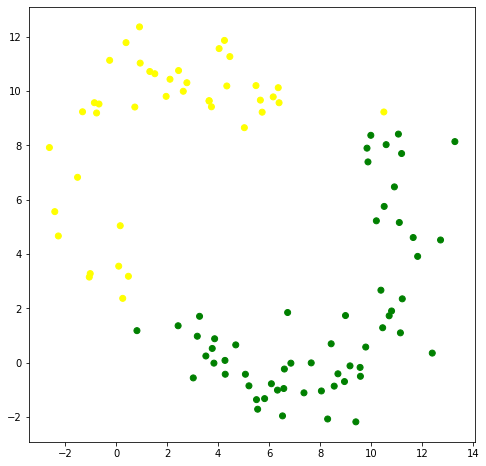

In [223]:
fig = plt.figure(figsize=(8,8))
colors = ['green','yellow']
plt.scatter(m3, n3, c=label_pred3,cmap=matplotlib.colors.ListedColormap(colors))

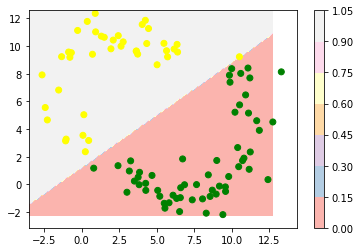

In [224]:
# plot the grid of x, y and z values as a surface
surface = plt.contourf(x_grid, y_grid, pp_grid, cmap='Pastel1')
plt.colorbar(surface)

label_pred3 = np.zeros((100,1))
m3 = np.zeros((100,1))
n3 = np.zeros((100,1))
for i in range(100):
    m3[i] = arr1[i,0]
    n3[i]= arr1[i,1]
    if output_label_class1[i]>output_label_class2[i]:
        label_pred3[i] = 0
    else:# output_label_class1[i]>output_label_class2[i]:
        label_pred3[i] = 1
#print(output_label_class2)
# create scatter plot for samples from each class
plt.scatter(m3, n3, c=label_pred3,cmap=matplotlib.colors.ListedColormap(colors))
# show the plot
plt.show()